In [30]:
import pandas as pd

# Leer el archivo CSV con el delimitador correcto
df = pd.read_csv('data.csv', delimiter=';', decimal='.', na_values=['', ' '])

print(df)
# Eliminar espacios en blanco de los nombres de las columnas
df.columns = df.columns.str.strip()

# Mostrar los nombres de las columnas para verificar
print("Columnas en el DataFrame:", df.columns)

# Ajustar el formato de los números grandes
pd.options.display.float_format = '{:,.2f}'.format

# Seleccionar las columnas 'Country Name' y los años de 1990 a 2023
columns_to_display = ['Country Name'] + [str(year) for year in range(1990, 2023)]
df_selected = df[columns_to_display]

print(df_selected)

    Country Name Country Code                         Indicator Name  \
0          Aruba          ABW  Área selvática (% del área de tierra)   
1            NaN          AFE  Área selvática (% del área de tierra)   
2     Afganistán          AFG  Área selvática (% del área de tierra)   
3            NaN          AFW  Área selvática (% del área de tierra)   
4         Angola          AGO  Área selvática (% del área de tierra)   
..           ...          ...                                    ...   
261       Kosovo          XKX  Área selvática (% del área de tierra)   
262        Yemen     Rep. del                                    YEM   
263    Sudáfrica          ZAF  Área selvática (% del área de tierra)   
264       Zambia          ZMB  Área selvática (% del área de tierra)   
265     Zimbabwe          ZWE  Área selvática (% del área de tierra)   

                            Indicator Code  1990  1991  1992  1993  1994  \
0                           AG.LND.FRST.ZS  2.33  2.33  2.3

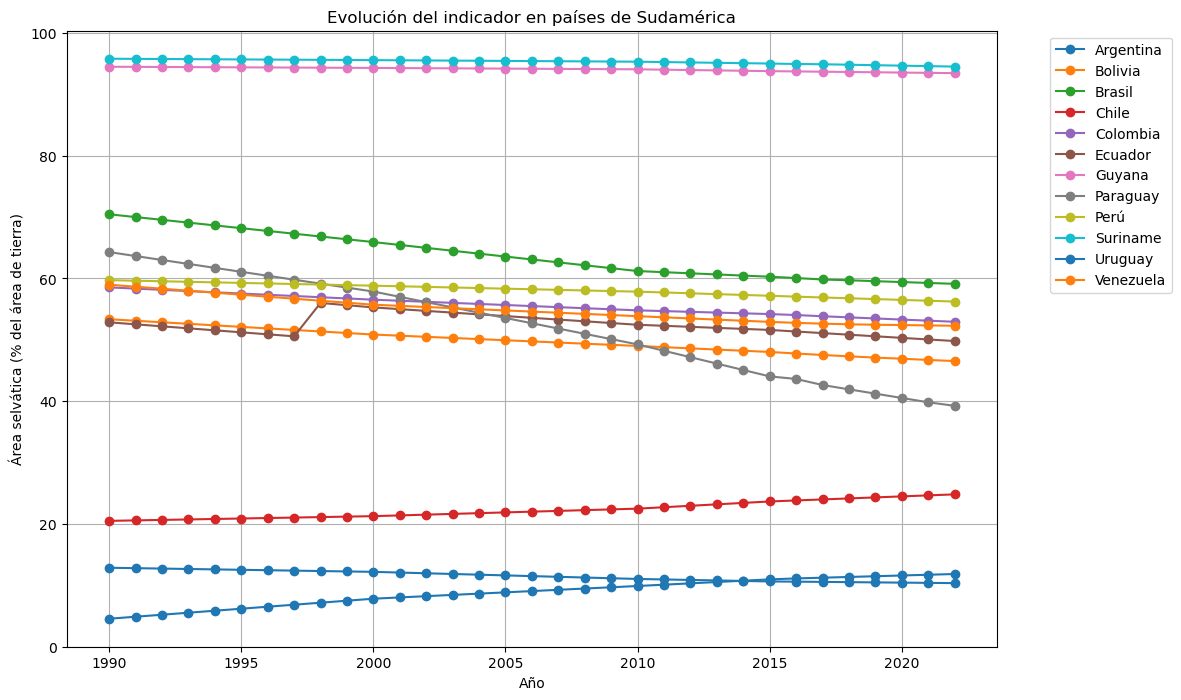

In [31]:
import matplotlib.pyplot as plt

# Lista de países de Sudamérica
paises_suramerica = ['Argentina', 'Bolivia', 'Brasil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Perú', 'Suriname', 'Uruguay', 'Venezuela']

# Filtrar el DataFrame para obtener los datos de los países de Sudamérica
df_suramerica = df[df['Country Name'].isin(paises_suramerica)]

# Obtener los años de las columnas
years = [int(col) for col in columns_to_display[1:]]

# Crear el gráfico
plt.figure(figsize=(12, 8))

for pais in paises_suramerica:
    df_pais = df_suramerica[df_suramerica['Country Name'] == pais]
    df_pais_years = df_pais[columns_to_display[1:]].astype(float)
    plt.plot(years, df_pais_years.values.flatten(), marker='o', label=pais)

plt.title('Evolución del indicador en países de Sudamérica')
plt.xlabel('Año')
plt.ylabel('Área selvática (% del área de tierra)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [32]:
import plotly.express as px

# Crear un DataFrame con los datos seleccionados
df_melted = df_suramerica.melt(id_vars=['Country Name'], value_vars=columns_to_display[1:], var_name='Year', value_name='Value')

# Convertir la columna 'Year' a tipo numérico
df_melted['Year'] = df_melted['Year'].astype(int)

# Crear el gráfico dinámico
fig = px.line(df_melted, x='Year', y='Value', color='Country Name', title='Evolución del indicador en países de Sudamérica')

# Mostrar el gráfico
fig.show()

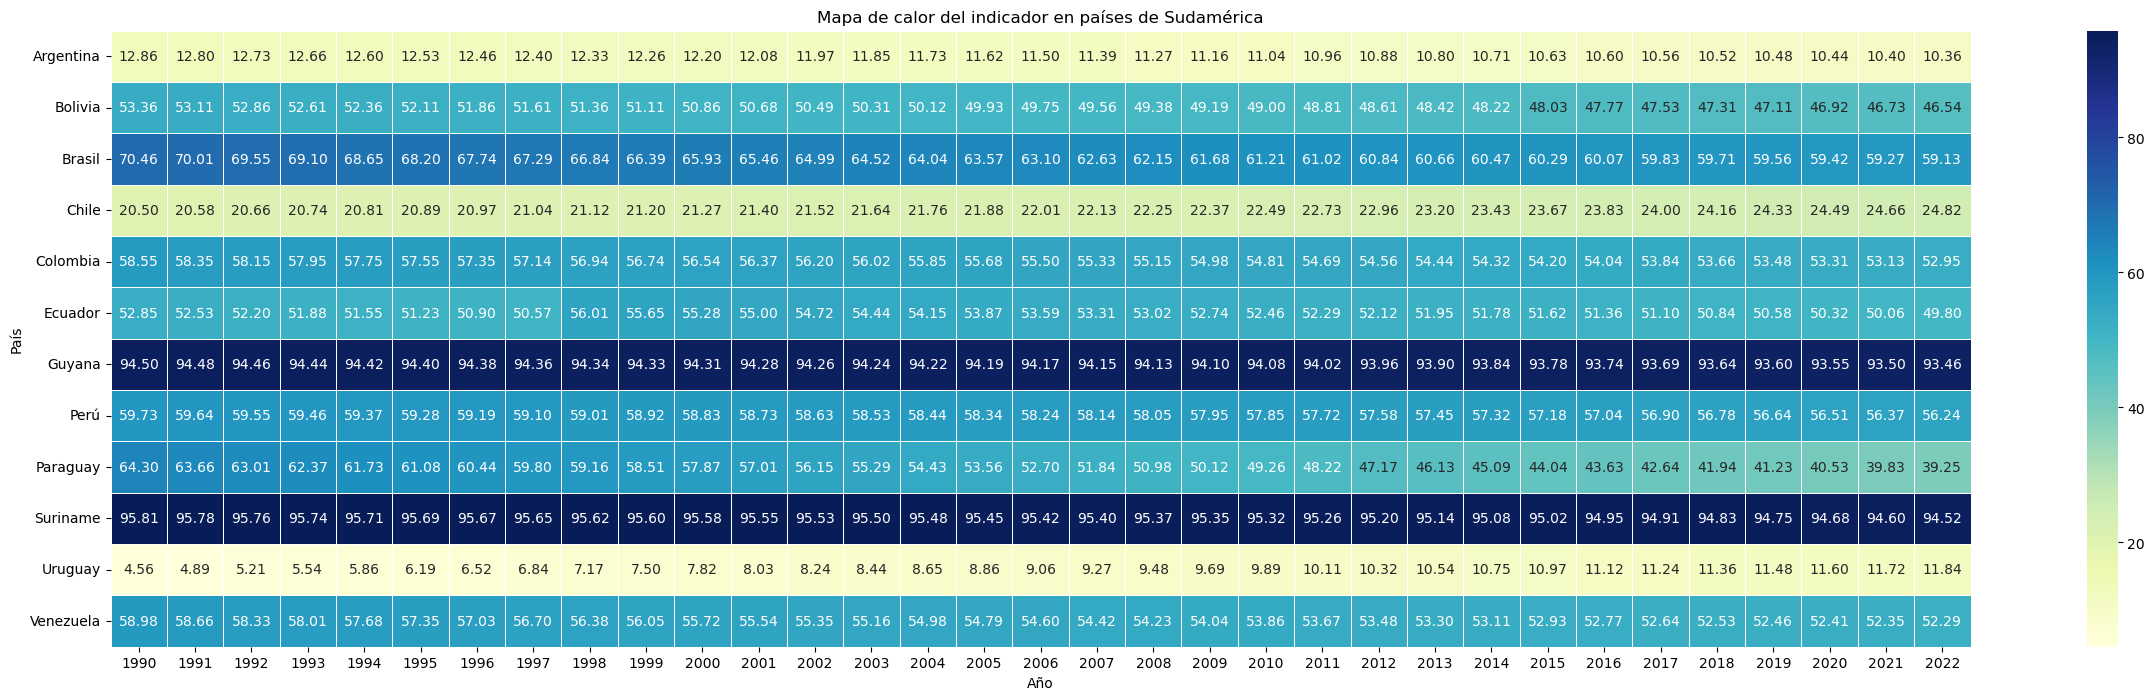

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una matriz de datos para el mapa de calor
heatmap_data = df_suramerica.set_index('Country Name')[columns_to_display[1:]].astype(float)

# Crear el mapa de calor
plt.figure(figsize=(30, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Mapa de calor del indicador en países de Sudamérica')
plt.xlabel('Año')
plt.ylabel('País')
plt.show()

       1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  ...  2013  \
count 12.00 12.00 12.00 12.00 12.00 12.00 12.00 12.00 12.00 12.00  ... 12.00   
mean  53.87 53.71 53.54 53.37 53.21 53.04 52.88 52.71 53.02 52.85  ... 50.49   
std   28.77 28.66 28.55 28.45 28.35 28.25 28.15 28.05 27.96 27.87  ... 26.96   
min    4.56  4.89  5.21  5.54  5.86  6.19  6.52  6.84  7.17  7.50  ... 10.54   
25%   44.77 44.54 44.32 44.09 43.87 43.64 43.42 43.19 43.80 43.63  ... 40.40   
50%   58.77 58.50 58.24 57.98 57.71 57.45 57.19 56.92 56.66 56.40  ... 52.63   
75%   65.84 65.24 64.65 64.05 63.46 62.86 62.27 61.67 61.08 60.78  ... 58.25   
max   95.81 95.78 95.76 95.74 95.71 95.69 95.67 95.65 95.62 95.60  ... 95.14   

       2014  2015  2016  2017  2018  2019  2020  2021  2022  
count 12.00 12.00 12.00 12.00 12.00 12.00 12.00 12.00 12.00  
mean  50.34 50.20 50.08 49.91 49.77 49.64 49.52 49.38 49.27  
std   26.91 26.86 26.81 26.78 26.74 26.71 26.67 26.64 26.61  
min   10.71 10.63 10.60 10.56 1

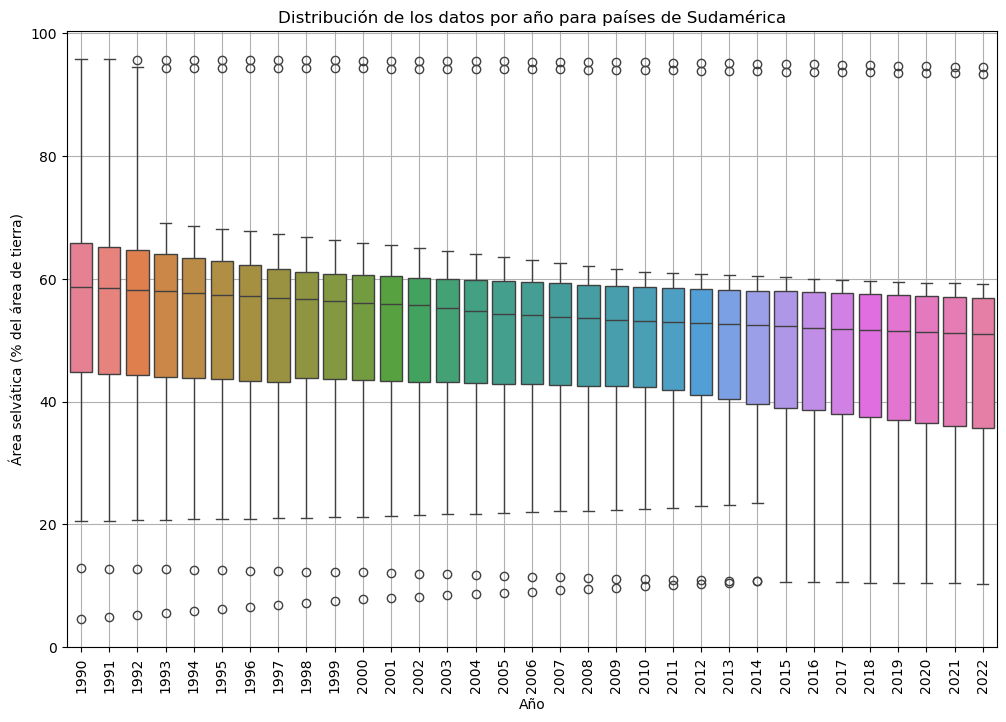

In [34]:
# Calcular estadísticas descriptivas para los países de Sudamérica
estadisticas = df_suramerica.describe()

# Mostrar las estadísticas
print(estadisticas)

# Graficar las estadísticas
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_suramerica[columns_to_display[1:]].astype(float))
plt.title('Distribución de los datos por año para países de Sudamérica')
plt.xlabel('Año')
plt.ylabel('Área selvática (% del área de tierra)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

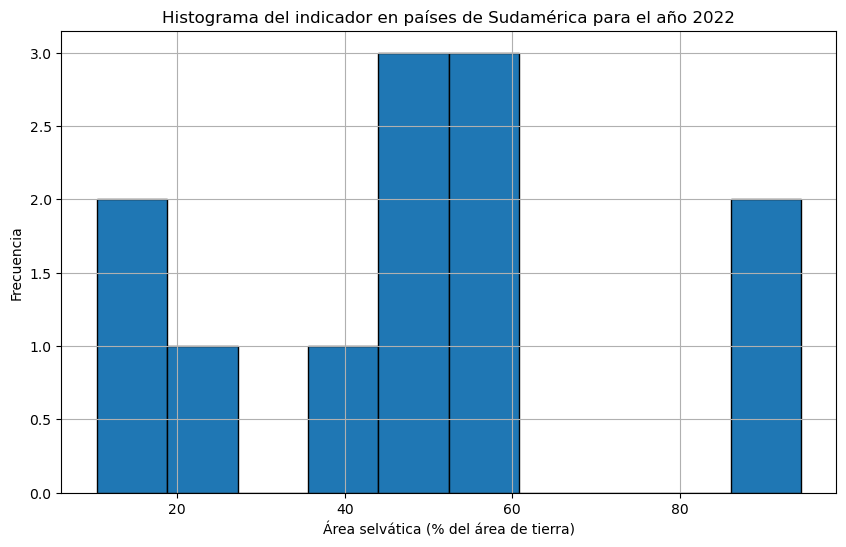

In [49]:
import matplotlib.pyplot as plt

# Seleccionar los datos del último año (2020)
ultimo_ano = 2022
datos_ultimo_ano = df_suramerica[str(ultimo_ano)].dropna()

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(datos_ultimo_ano, bins=10, edgecolor='black')
plt.title(f'Histograma del indicador en países de Sudamérica para el año {ultimo_ano}')
plt.xlabel('Área selvática (% del área de tierra)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

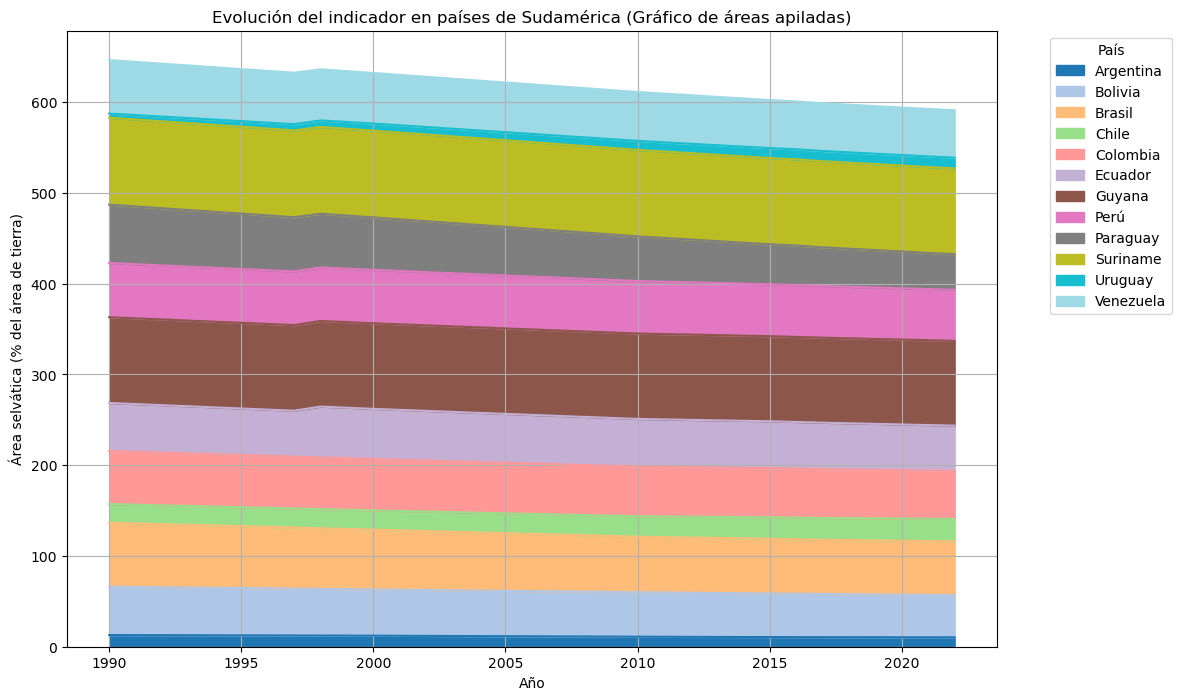

In [50]:
# Crear el gráfico de áreas apiladas
plt.figure(figsize=(12, 8))

# Transponer el DataFrame para que los años sean las filas y los países las columnas
df_stacked = df_suramerica.set_index('Country Name')[columns_to_display[1:]].T

# Crear el gráfico de áreas apiladas
df_stacked.plot(kind='area', stacked=True, figsize=(12, 8), cmap='tab20')

plt.title('Evolución del indicador en países de Sudamérica (Gráfico de áreas apiladas)')
plt.xlabel('Año')
plt.ylabel('Área selvática (% del área de tierra)')
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

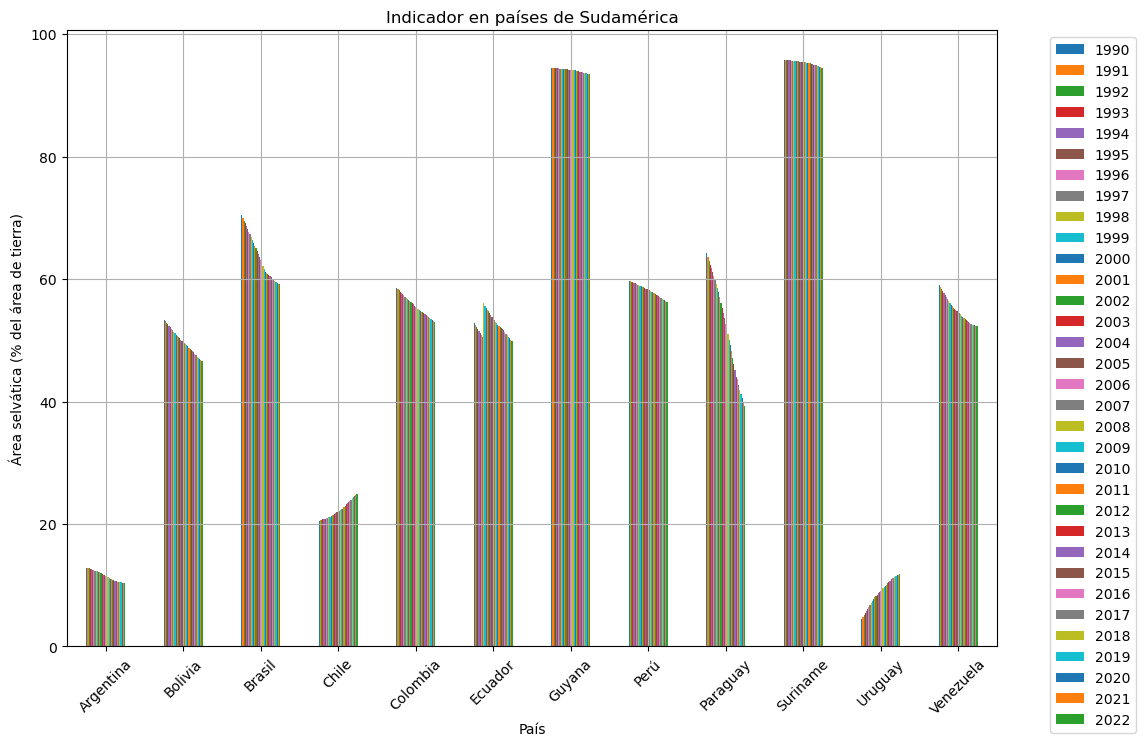

In [51]:
# Crear un diagrama de barras para el DataFrame df_suramerica
df_suramerica.plot(kind='bar', x='Country Name', figsize=(12, 8))

plt.title('Indicador en países de Sudamérica')
plt.xlabel('País')
plt.ylabel('Área selvática (% del área de tierra)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Ajustar la posición de la leyenda
plt.grid(True)
plt.show()

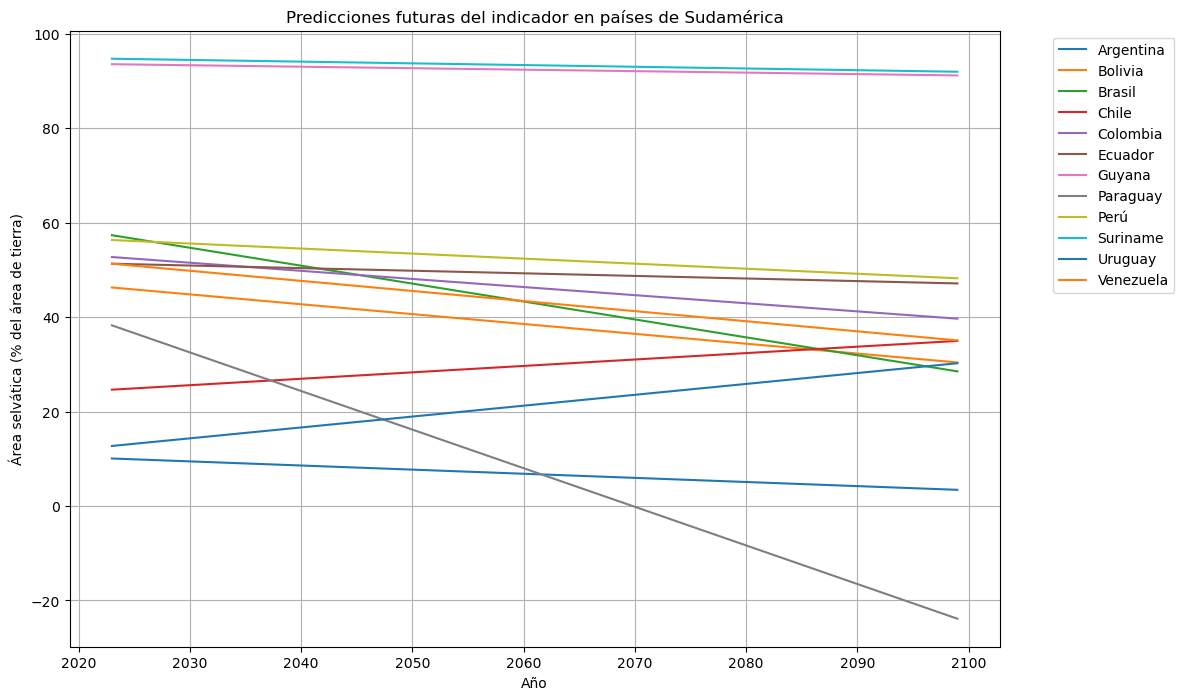

In [52]:
plt.figure(figsize=(12, 8))

for pais, datos in resultados.items():
    plt.plot(future_years.flatten(), datos['future_predictions'], label=pais)

plt.title('Predicciones futuras del indicador en países de Sudamérica')
plt.xlabel('Año')
plt.ylabel('Área selvática (% del área de tierra)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
